In [57]:
from nltk.tokenize import word_tokenize
import re
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
data = pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7212 non-null   object
 1   Target  6916 non-null   object
dtypes: object(2)
memory usage: 112.8+ KB


In [59]:
tfid = TfidfVectorizer()
X_tfidf = tfid.fit_transform(data['Text'])
print("Shape of TF-IDF matrix:", X_tfidf.shape) 

Shape of TF-IDF matrix: (7212, 3248)


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


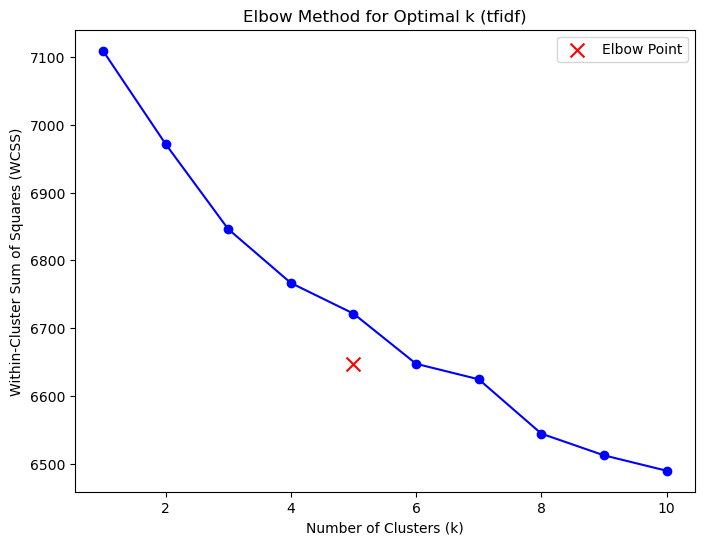

Optimal number of clusters (k): 6


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_tfidf)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k (tfidf)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

second_derivative = np.diff(np.diff(wcss))

# Find the index of the maximum value in the second derivative
elbow_index = np.argmax(second_derivative) + 1

# Mark the elbow point on the plot
plt.scatter(elbow_index, wcss[elbow_index], c='red', marker='x', s=100, label='Elbow Point')

plt.legend()
plt.show()

# Print the optimal k value
optimal_k = elbow_index + 1  # Adding 1 because the index starts from 0
print(f'Optimal number of clusters (k): {optimal_k}')


# Kmeans tfidf

In [61]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, init='k-means++')
model.fit(X_tfidf)

KMeans(n_clusters=6)

In [62]:
labels = model.labels_
cluster_center=model.cluster_centers_
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00710442e-04, 7.44696735e-05, 0.00000000e+00, ...,
        5.51416702e-04, 3.35240698e-04, 1.88323917e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.04897008e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [63]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(X_tfidf, labels, metric='euclidean')
silhouette_score

0.018854178487416367

Top terms and count per cluster:
Cluster 0: өөр шилжсэн ажилд байгууллагад орсон болсон орох газар ажиллах цэцэрлэгт сургуульд шилжих ажил ажиллахаар руу шилжин орохоор байгууллагат байгуулагад төрийн
Data points in Cluster 0: 673


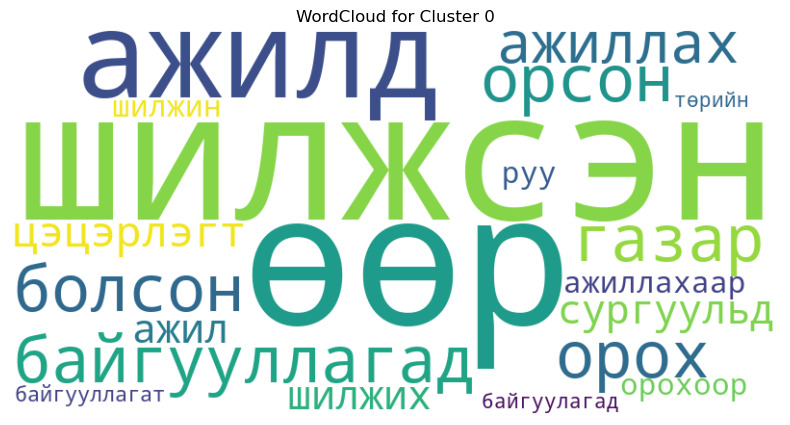

Cluster 1: болсон шилжсэн ажиллах сургуульд багшаар өөрийн хүсэлтээр орсон багш цэцэрлэгт гэр орон татан ажиллахаар хувийн руу гарсан буугдсан явсан сургууль
Data points in Cluster 1: 5310


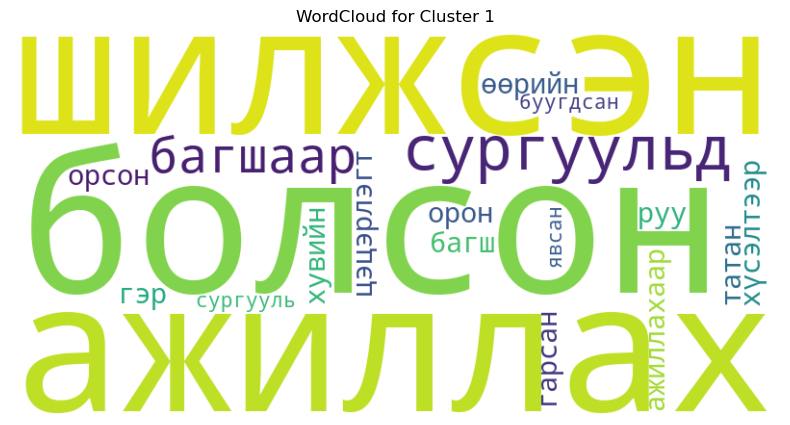

Cluster 2: ажилласан шилжин түр дэвшин өөр багшаар оронд багшийн шилжиж байгууллагад цэцэрлэгт жил жирэмсний арга бүлгийн тоонд зүйчээр нөхөн орон туслах
Data points in Cluster 2: 249


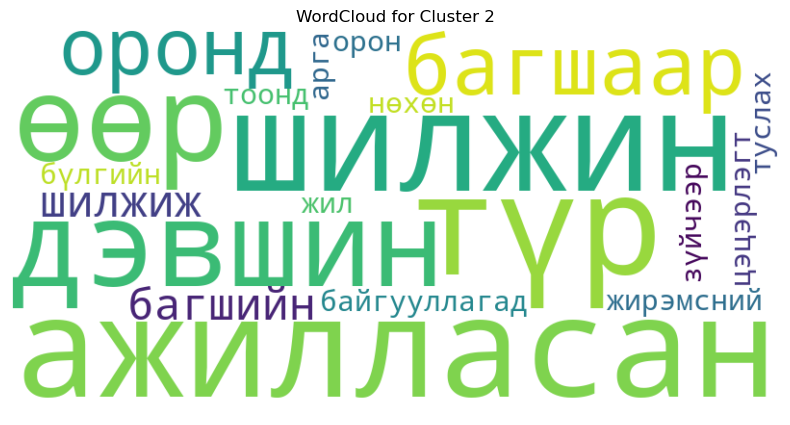

Cluster 3: томилогдсон тушаал албан дэвшсэн эрхлэгчээр тушаалд цэцэрлэгийн багшаар өөрчлөгдсөн ахисан арга эрхлэгчийн өөр цэцэрлэгт захирлын захирлаар зүйчээр туслах бүлгийн сургуулийн
Data points in Cluster 3: 421


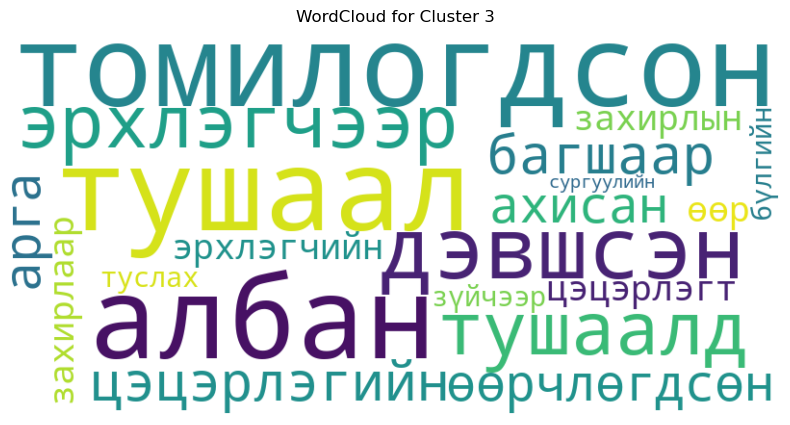

Cluster 4: оронд хүний байсан ажиллаж түр амралттай жирэмсний ажилласан жирэмсэн багшийн чөлөөтэй жирэмсэний авсан декриттэй ажилсан амаржсан амаржсаны амралт учраас төрсөн
Data points in Cluster 4: 297


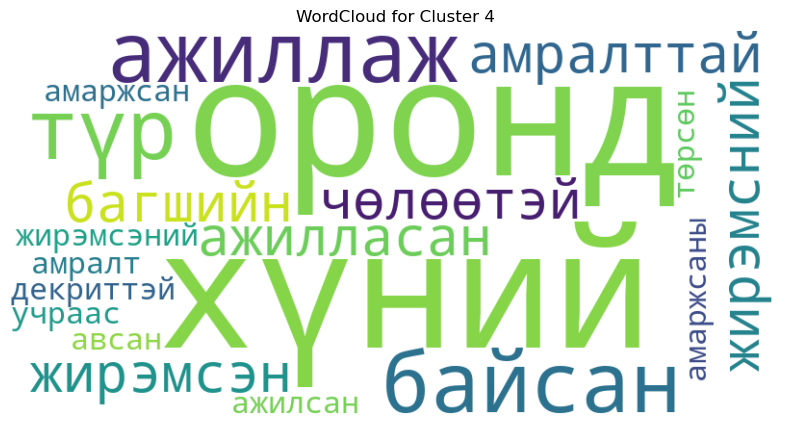

Cluster 5: түр байсан ажиллаж орон дээр тоон тоонд байгаа ажлын багшийн тоо байранд хүний хугацаагаар одоо тооны тул ажилтан багшаар байр
Data points in Cluster 5: 262


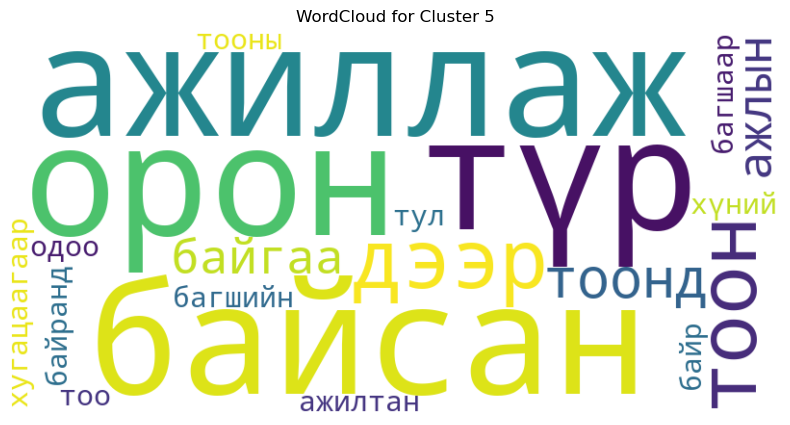

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("Top terms and count per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfid.get_feature_names_out()

for i in range(6):
    print("Cluster %d:" % i, end='')
    top_words = []
    for ind in order_centroids[i, :20]:
        word = terms[ind]
        print(' %s' % word, end='')
        top_words.append(word)
    print()

    # Count the number of data points in the current cluster
    cluster_data_count = sum(model.labels_ == i)
    print("Data points in Cluster %d: %d" % (i, cluster_data_count))

    # Create a WordCloud for the current cluster's top words
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

    # Display the WordCloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud for Cluster %d' % i)
    plt.show()